# Data Exploration
## Introduction
This study presents a comprehensive exploratory data analysis of the Wine Quality datasets, which constitute the empirical foundation for the present investigation. The analysis encompasses both red and white wine variants from the Portuguese "Vinho Verde" collection, with the objective of elucidating the underlying patterns and physicochemical characteristics that determine wine quality assessments.

The analysis commences with the requisite library imports and the configuration of graphical parameters to ensure consistent, publication-standard visualizations throughout the investigative process.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

COLOR_RED = "#720026"
COLOR_WHITE = "#DBDD46"

The first dataset will be loaded and subjected to systematic examination of its constituent features, data types, and structural properties to establish a comprehensive understanding of the data architecture.

In [ ]:
red_wine = pd.read_csv('../data/winequality-red.csv', sep=';')
red_wine.head()

The second dataset will then be examined using the same analytical approach

In [ ]:
white_wine = pd.read_csv('../data/winequality-white.csv', sep=';')
white_wine.head()

It's clear that we're working exclusively with *numerical* (float) data, and both datasets share **identical feature sets**.

We will now examine additional dataset characteristics, including sample size, and compare statistical measures such as mean, standard deviation, and median across both datasets.

In [ ]:
red_wine.describe()

And then with the second dataset.

In [ ]:
white_wine.describe()

The initial observation reveals a substantial imbalance between the datasets: the red wine dataset comprises 1,599 samples while the white wine dataset contains 4,898 samples, resulting in an inherently unbalanced combined dataset. Furthermore, the majority of features demonstrate distinct statistical properties (mean, standard deviation, and median) across the two wine types, indicating that wine color significantly influences physicochemical characteristics. Notably, alcohol content represents the sole feature exhibiting comparable statistical properties between both datasets.

Let's now examine the datasets for any inconsistencies or data quality issues.

In [ ]:
red_wine.isnull().sum()

In [ ]:
white_wine.isnull().sum()

Fortunately, there are no missing values in either dataset.

Subsequently, the distributions will be plotted to examine the underlying data patterns and distributional characteristics.

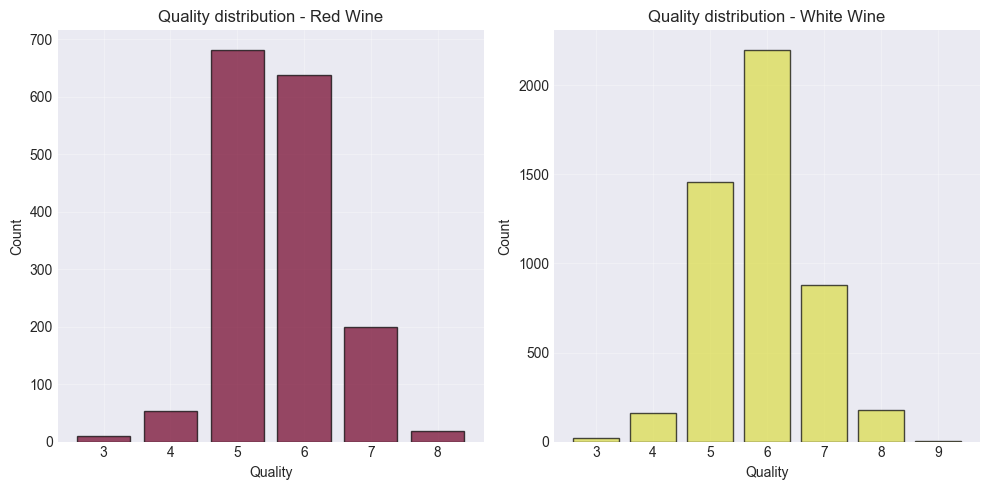

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

red_quality_counts = red_wine['quality'].value_counts().sort_index()
white_quality_counts = white_wine['quality'].value_counts().sort_index()

def build_distribution_bar(num_axes, wine_quality_counts, color, wine_color):
    axes[num_axes].bar(wine_quality_counts.index, wine_quality_counts.values, edgecolor='black', alpha=0.7, color=color)
    axes[num_axes].set_title(f'Quality distribution - {wine_color}') 
    axes[num_axes].set_xlabel('Quality')
    axes[num_axes].set_ylabel('Count')
    axes[num_axes].grid(True, alpha=0.3)

build_distribution_bar(0, red_quality_counts, COLOR_RED, 'Red Wine')
build_distribution_bar(1, white_quality_counts, COLOR_WHITE, 'White Wine')

plt.tight_layout()
plt.show()

To facilitate a more comprehensive comparison between the two datasets, quality values will be normalized and plotted as percentages to ensure an equitable comparative analysis.

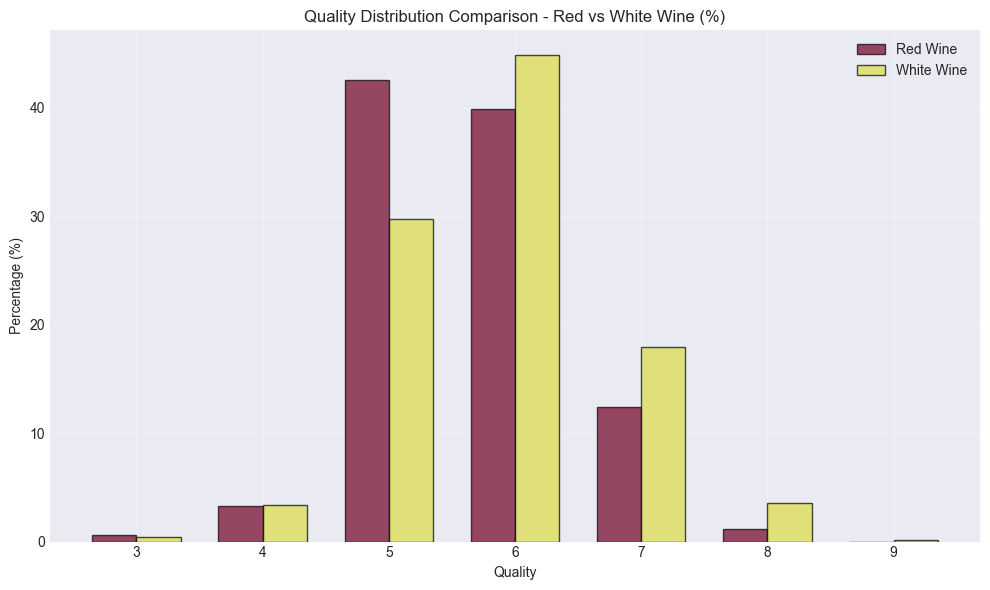

In [ ]:
red_quality_counts = red_wine['quality'].value_counts(normalize=True).sort_index() * 100
white_quality_counts = white_wine['quality'].value_counts(normalize=True).sort_index() * 100

all_quality_levels = sorted(set(red_quality_counts.index) | set(white_quality_counts.index))

red_quality_aligned = red_quality_counts.reindex(all_quality_levels, fill_value=0)
white_quality_aligned = white_quality_counts.reindex(all_quality_levels, fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))

width = 0.35
x = all_quality_levels

bars1 = ax.bar([i - width/2 for i in x], red_quality_aligned.values, width,label='Red Wine', color=COLOR_RED, alpha=0.7, edgecolor='black')
bars2 = ax.bar([i + width/2 for i in x], white_quality_aligned.values, width,label='White Wine', color=COLOR_WHITE, alpha=0.7, edgecolor='black')

ax.set_title('Quality Distribution Comparison - Red vs White Wine (%)')
ax.set_xlabel('Quality')
ax.set_ylabel('Percentage (%)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

The analysis suggests that white wines exhibit superior overall quality ratings compared to red wines.